**Time Series Forecasting using FBProphet**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
fdata = pd.read_csv('/content/sample_data/rcSales.csv')
fdata

,Month,Volume
0,01/01/2001,648
1,01/02/2001,646
2,01/03/2001,639
3,01/04/2001,654
4,01/05/2001,630
...,...,...
109,01/02/2010,1425
110,01/03/2010,1419
111,01/04/2010,1432
112,01/05/2010,1394


Convert the date in string to datetime format

In [3]:
fdata['Month']=pd.to_datetime(fdata['Month'], format='%d/%m/%Y')

In [4]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   114 non-null    datetime64[ns]
 1   Volume  114 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


Model expects the columns to be in a specific format  ds (datetype) and y, the time series

In [5]:
from pandas import to_datetime
fdata.columns = ['ds', 'y']
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      114 non-null    datetime64[ns]
 1   y       114 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


Load the required library and create an instance

In [6]:
from prophet import Prophet

In [7]:
fmodel = Prophet()

Pass the data and fit

In [9]:
fmodel.fit(fdata)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj_pujn9j/i2_2m4g0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj_pujn9j/g68ca74p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12531', 'data', 'file=/tmp/tmpj_pujn9j/i2_2m4g0.json', 'init=/tmp/tmpj_pujn9j/g68ca74p.json', 'output', 'file=/tmp/tmpj_pujn9j/prophet_modela9lhffn0/prophet_model-20241229061637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
datachk  = fdata.copy()


Plot and check the actuals and the prediction

<Axes: >

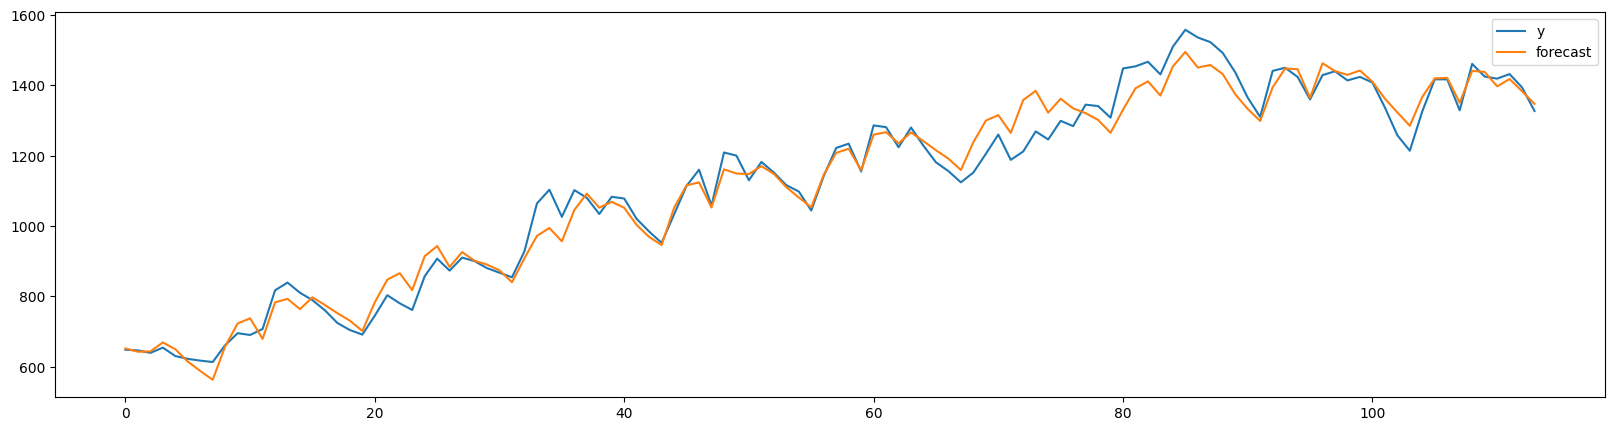

In [11]:
datachk['forecast'] = fmodel.predict(fdata)['yhat']
datachk[['y','forecast']].plot(figsize=(20,5))

Create the time interval to forecast

In [28]:
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime('2010-07-01', "%Y-%m-%d")
datelist = [start + relativedelta(months=x) for x in range(0,12)]
#print(datelist)

future = pd.DataFrame(datelist, columns=['ds'])
data2 = pd.concat([fdata,future])


In [26]:
#fdata

In [29]:
data2.tail(15)

,ds,y
111,2010-04-01,1432.0
112,2010-05-01,1394.0
113,2010-06-01,1327.0
0,2010-07-01,NaN
1,2010-08-01,NaN
2,2010-09-01,NaN
3,2010-10-01,NaN
4,2010-11-01,NaN
5,2010-12-01,NaN
6,2011-01-01,NaN


In [30]:
#datachk['forecast'] = fmodel.predict(data2)['yhat']

,yhat
0,651.542670
1,642.345669
2,643.231168
3,668.606820
4,649.382928
...,...
121,1435.536294
122,1364.365669
123,1393.657836
124,1356.410648


In [32]:
fdata.tail(1)

,ds,y
113,2010-06-01,1327


Forecast the y-values for the future time series and plot them

In [33]:
data3 = fmodel.predict(data2.iloc[114:,0:2])[['ds','yhat']]
data3 = pd.concat([fdata,data3],axis=0).reset_index(drop=True)
data3

,ds,y,yhat
0,2001-01-01,648.0,NaN
1,2001-02-01,646.0,NaN
2,2001-03-01,639.0,NaN
3,2001-04-01,654.0,NaN
4,2001-05-01,630.0,NaN
...,...,...,...
121,2011-02-01,NaN,1435.536294
122,2011-03-01,NaN,1364.365669
123,2011-04-01,NaN,1393.657836
124,2011-05-01,NaN,1356.410648


<Axes: >

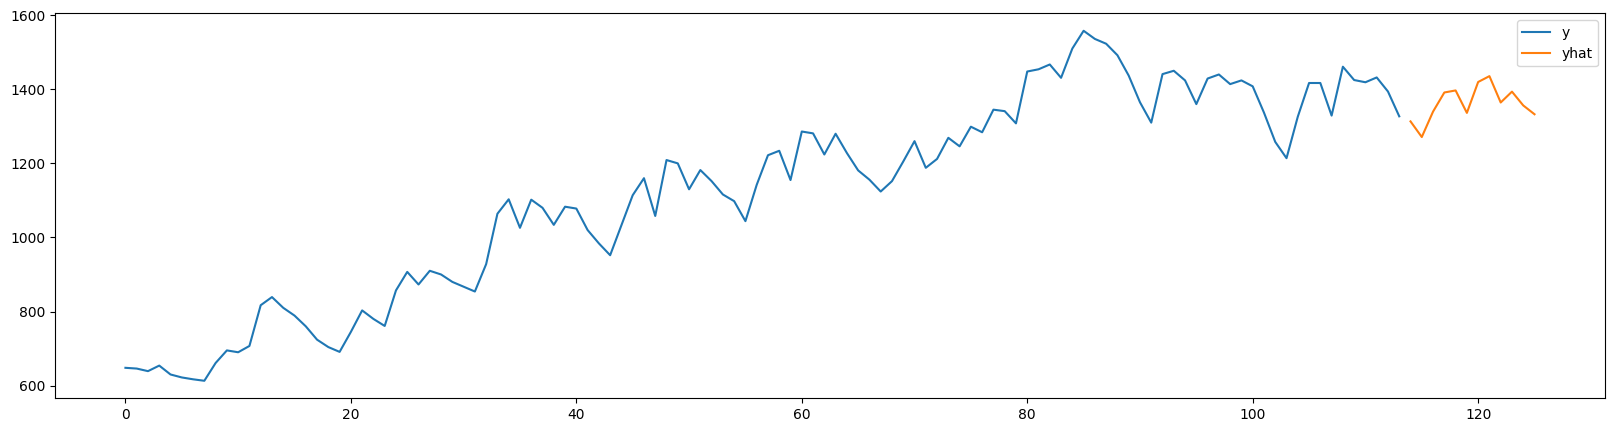

In [34]:
data3[['y','yhat']].plot(figsize=(20,5))

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(datachk['y'],datachk['forecast'])

33.41402837732212

In [38]:
datachk

,ds,y,forecast
0,2001-01-01,648,651.542670
1,2001-02-01,646,642.345669
2,2001-03-01,639,643.231168
3,2001-04-01,654,668.606820
4,2001-05-01,630,649.382928
...,...,...,...
109,2010-02-01,1425,1438.136317
110,2010-03-01,1419,1397.197965
111,2010-04-01,1432,1417.886359
112,2010-05-01,1394,1383.263250
